In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk 
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# data organization
# -data reading
raw_data = "train.csv"
data = pd.read_csv(raw_data)

# -splitting the data 
n_data = data.fillna(999) # data with outliers
data = data.dropna() # data without NaN values

# -storing values and making them workable
#-- data with outliers
x_nd = [float(a) for a in n_data['x'].values] 
y_nd = [float(a) for a in n_data['y'].values]

#-- data without NaN values
g_x = [float(a) for a in data['x'].values]
g_y = [float(a) for a in data['y'].values]

#--- train data
x = g_x[0:int(0.1*len(g_x))]
y = g_y[0:int(0.1*len(g_y))]

#--- test data
x_t = g_x[int(0.1*len(x)):]
y_t = g_y[int(0.1*len(x)):]

In [15]:
# line fitting
# -finding the mean and std of my label and attribute
mean_x = sum(x)/len(x)
mean_y = sum(y)/len(y)

std_x = np.std(x)
std_y = np.std(y)

# -finding the accuracy using the least squares line
r = sum([((a-mean_x)/std_x)*((b-mean_y)/std_y) for a,b in zip(x,y)])/(len(x))

# -finding the slope m
m = r*(std_y/std_x) # using least squares
m2 = ((mean_x*mean_y) - (sum([a*b for a,b in zip(x,y)])/len(x))) / ((mean_x**2) - (sum([a**2 for a in x])/len(x))) # using normal formulas

# -finding the costant or y-intercept
c = mean_y - (m*mean_x)
print(r,r2)

1.0092167768869538 0.9892101568402489


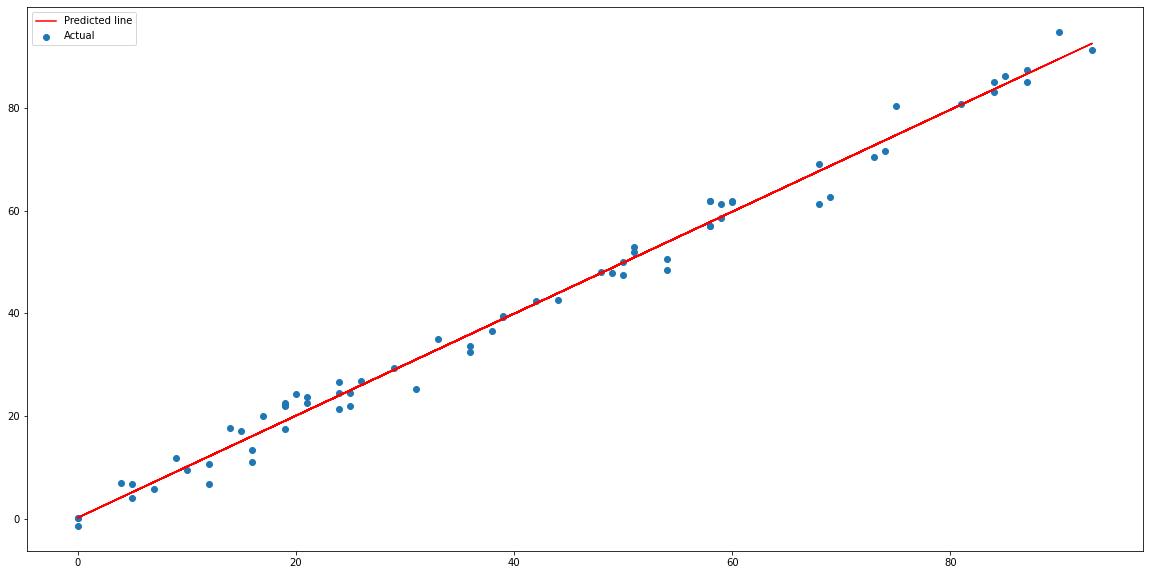

0.9892101568402489

In [4]:
# Data visualisation
#- creating predicted values
new_y = [(m*a)+c for a in x]

#- finding the squared error
r2 = 1 - (sum([(a-b)**2 for a,b in zip(new_y,y)])/sum([(a-mean_y)**2 for a in y]))

#- graphing predicted values
plt.plot(x,new_y,label="Predicted line",color="r")

#- graphing actual values
plt.scatter(x,y,label="Actual")
plt.legend()
plt.show()
r2

In [12]:
# checking accuracy
#- generating predicted y for test data
t_new_y = [(m*a)+c for a in x_t]

# -finding the mean and std of my label and attribute of my testing data
mean_x_t = sum(x_t)/len(x_t)
mean_y_t = (m*mean_x_t)+c

std_x_t = np.std(x_t)
std_y_t = np.std(y_t)

# -finding the accuracy of the test data using the least squares line
r_t = sum([((a-mean_x_t)/std_x_t)*((b-mean_y_t)/std_y_t) for a,b in zip(x_t,y_t)])/(len(x_t))

# - //      //   //     //  //  //  //    //    squared error
r2_t = 1 - (sum([(a-b)**2 for a,b in zip(t_new_y,y_t)])/sum([(a-mean_y)**2 for a in y_t]))

0.9915178391224713 0.9953363592677245


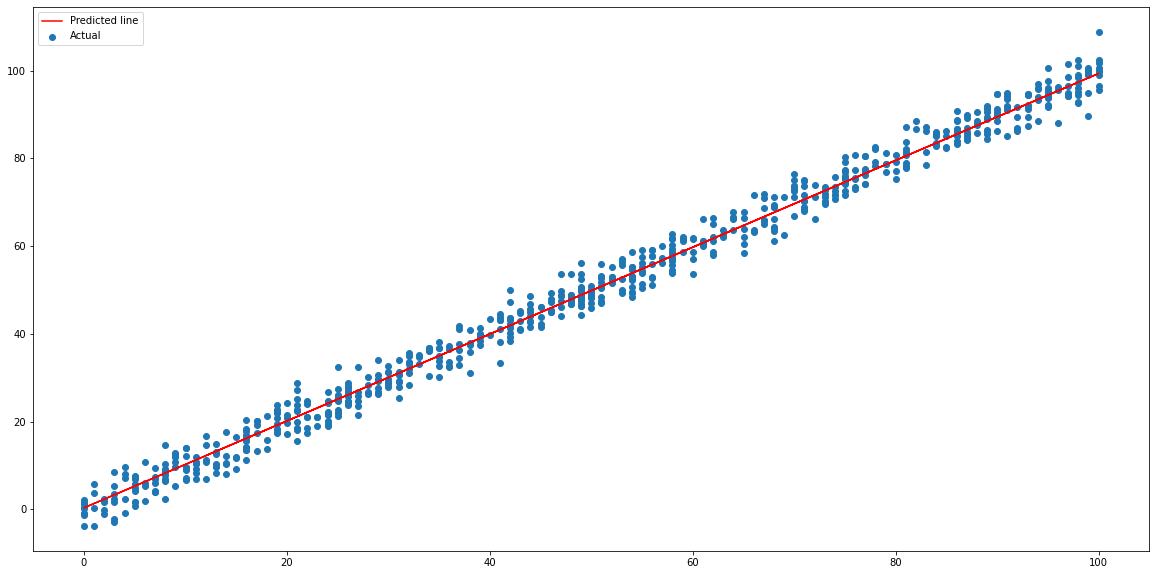

In [148]:
# test Data visualisation
#- graphing predicted values
plt.plot(x_t,t_new_y,label="Predicted line",color="r")

#- graphing actual values
plt.scatter(x_t,y_t,label="Actual")
plt.legend()
plt.show()